## This notebook shall help to understand the process how we get from contours to a segmentation.

Let's describe the process:
- We threshold the input which shall contain the probability that a pixel belongs to a contour by 0.5.
- In the resulting binary images, we search for connected components with treating 1 as the background color.
- To ensure that we only use connected components, that belong to parts of the image that depict nuclei, for our further analysis, we only use bright (high DNA content) connected components. This filters out connected components that belong to the background.
- We define bright as the mean intensity of the pixels in the connected component to be higher than 50.
- The number 50 is derived by analyzing all training images. The histogram distributions is clearly composed by the distribution of the dark background pixels and the distribution of the bright pixels depicting DNA stain. The minimum of the histogram best splitting both distributions is around 50 as we show in the appendix below.

# Imports

In [1]:
%matplotlib inline

import skimage.io
import skimage.morphology

import numpy as np

import matplotlib.pyplot as plt

# Load sample image

In [3]:
image = skimage.io.imread('/home/jr0th/github/segmentation/data/BBBC022/test/x/all/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637_0_0.png')
boundary = skimage.io.imread('/home/jr0th/github/segmentation/data/BBBC022/test/y_boundary_2/all/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637_0_0.png')
correct_labels = skimage.io.imread('/home/jr0th/github/segmentation/data/BBBC022/test/y_label_binary_2/all/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637_0_0.png')

We can see that there a certain regions of the image that are not connected to the "big connected background". These are small connected components that should be filtered out.

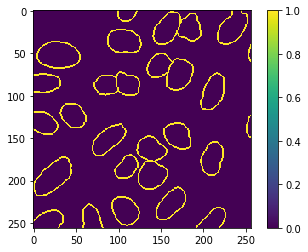

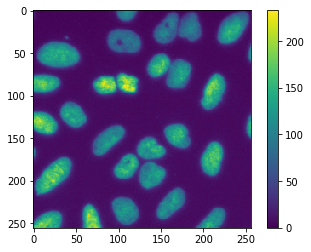

In [4]:
plt.imshow(boundary)
plt.colorbar()
plt.show()

plt.imshow(image)
plt.colorbar()
plt.show()

# Find connected components in outline image

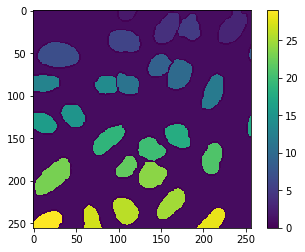

In [5]:
labels = skimage.morphology.label(boundary, background=1)

plt.imshow(labels)
plt.colorbar()
plt.show()

# Prepare loop over all connected components to filter out those which correspond to background regions

In [6]:
n_ccs = np.max(labels)
print('Number of connected components:', n_ccs)

# buffer label image
filtered_labels = np.zeros_like(labels, dtype=np.uint16)

# relabel as we don't know what connected component the background has been given before
label_index = 1

Number of connected components: 29


# Loop over all components

In [7]:
# start at 1 (0 is contours), end at number of connected components
for i in range(1, n_ccs + 1):
    
    # get mask of connected compoenents
    mask = labels == i
    
    # get mean
    mean = np.mean(np.take(image.flatten(),np.nonzero(mask.flatten())))

    if(mean > 50):
        filtered_labels[mask] = label_index
        label_index = label_index + 1

# Plot to see what we did

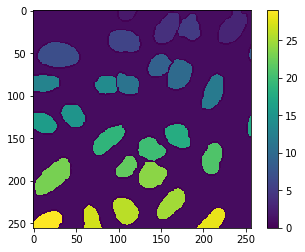

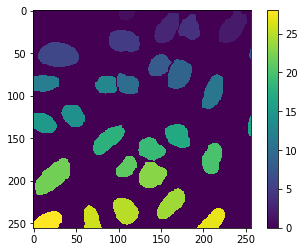

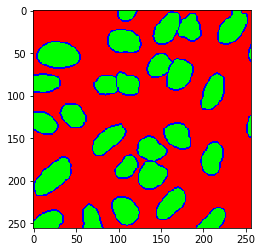

In [8]:
plt.imshow(labels)
plt.colorbar()
plt.show()
plt.imshow(filtered_labels)
plt.colorbar()
plt.show()
plt.imshow(correct_labels)
plt.show()

# Appendix: Threshold for defining a bright region

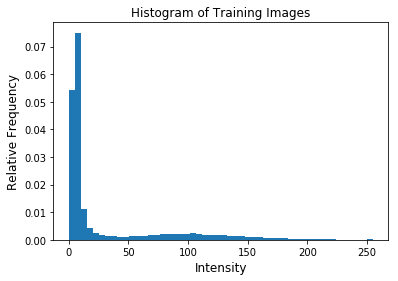

In [30]:
# load all images
images = skimage.io.imread_collection('/home/jr0th/github/segmentation/data/BBBC022/training/x/all/*')
all_data = images.concatenate()

# plot histogram
plt.hist(all_data.flatten(),bins=50,normed=True)
plt.title('Histogram of Training Images', size = 12)
plt.ylabel('Relative Frequency', size = 12)
plt.xlabel('Intensity', size = 12)
plt.savefig('training_set_hist.eps')
plt.show()

We can see that the minimum separating the two subdistributions is at 50 roughly, this determined the choice above.